## A.)

#### A különböző könyvtárk és alkönyvtárak beimportálása:

In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

#### Az adathalmaz beolvasása

In [371]:
df = pd.read_csv('data57.csv')
df.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


#### Az adathalmaz méretének lekérdezése

In [372]:
df.shape

(344, 19)

#### Az információs panel

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
Page total likes                                                       344 non-null int64
Type                                                                   344 non-null object
Category                                                               344 non-null int64
Post Month                                                             344 non-null int64
Post Weekday                                                           344 non-null int64
Post Hour                                                              344 non-null int64
Paid                                                                   344 non-null int64
Lifetime Post Total Reach                                              344 non-null int64
Lifetime Post Total Impressions                                        344 non-null int64
Lifetime Engaged Users                                                 344 non-null 

#### A 245-ös sor eldobása, mivel itt egy extrém kiugró érték van

In [374]:
df=df.drop([244])

#### Statisztikai adatok lekérdezése

In [375]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,342.000000,339.000000,343.000000
mean,132891.772595,1.862974,8.839650,4.110787,7.402332,0.274052,12219.548105,23325.381924,849.559767,729.466472,1275.489796,12369.209913,6039.405248,611.693878,7.023324,170.350877,24.728614,201.317784
std,5682.821044,0.813914,2.195277,2.044669,4.032209,0.446687,18277.991682,38086.088200,844.788161,789.998078,1925.224697,16497.717911,6836.946071,659.342905,13.099240,222.703187,24.282547,251.098874
min,117764.000000,1.000000,5.000000,1.000000,1.000000,0.000000,584.000000,1029.000000,15.000000,15.000000,19.000000,935.000000,511.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,129600.000000,1.000000,7.000000,2.000000,3.000000,0.000000,2767.500000,4926.000000,356.000000,292.000000,430.500000,3480.000000,1895.500000,265.500000,1.000000,57.000000,10.000000,70.500000
50%,135195.000000,2.000000,9.000000,4.000000,9.000000,0.000000,4452.000000,8039.000000,569.000000,477.000000,719.000000,5063.000000,2868.000000,375.000000,3.000000,102.000000,18.000000,125.000000
75%,137177.000000,3.000000,11.000000,6.000000,11.000000,1.000000,13248.000000,24468.000000,968.500000,838.500000,1352.000000,15814.500000,8040.000000,646.000000,7.000000,193.750000,31.500000,234.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,139008.000000,277100.000000,6164.000000,5934.000000,19779.000000,122474.000000,39776.000000,4376.000000,144.000000,1622.000000,208.000000,1974.000000


#### Néhány oszlop átnevezése

In [376]:
df=df.rename(columns={'Lifetime Post Total Reach' : 'Post Nézettség'})
df=df.rename(columns={'Lifetime Post Total Impressions' : 'Post Feltűnés'})
df=df.rename(columns={'Lifetime Engaged Users' : 'Egyedi fálhasználók click'})
df=df.rename(columns={'Lifetime Post Consumers' : 'Összes felhasználó click'})
df=df.rename(columns={'Lifetime Post Consumptions' : 'Clickek'})
df=df.rename(columns={'Lifetime Post Impressions by people who have liked your Page' : 'Post Feltűnés-követők'})
df=df.rename(columns={'Lifetime Post reach by people who like your Page' : 'Post Nézettség-követők'})
df=df.rename(columns={'Lifetime People who have liked your Page and engaged with your post' : 'Követők click'})

#### A hiányzó értékek feltérképezése

In [377]:
df.isnull().sum()

Page total likes             0
Type                         0
Category                     0
Post Month                   0
Post Weekday                 0
Post Hour                    0
Paid                         0
Post Nézettség               0
Post Feltűnés                0
Egyedi fálhasználók click    0
Összes felhasználó click     0
Clickek                      0
Post Feltűnés-követők        0
Post Nézettség-követők       0
Követők click                0
comment                      0
like                         1
share                        4
Total Interactions           0
dtype: int64

#### Az üres cellák feltöltése az átlagokkal

In [378]:
mean = int(df['like'].mean())
df['like'].fillna(mean, inplace=True)

In [379]:
mean = int(df['share'].mean())
df['share'].fillna(mean, inplace=True)

In [380]:
df.isnull().sum().sum()

0

#### Az utolsó 4 oszlop elkülönítése és rendezése csökkenő sorrendbe

In [381]:
harmas=df.loc[:,'comment':'Total Interactions']

In [382]:
harmas.sort_values(by='Total Interactions',ascending=False).head(10)

,comment,like,share,Total Interactions
168,144,1622.0,208.0,1974
3,58,1572.0,147.0,1777
101,26,1505.0,95.0,1626
323,20,1372.0,47.0,1439
199,33,1155.0,102.0,1290
176,29,1047.0,98.0,1174
105,42,955.0,139.0,1136
142,60,859.0,90.0,1009
206,4,859.0,68.0,931
254,10,755.0,58.0,823


#### Néhány statisztikai lekérdezés

In [383]:
df['Total Interactions'].mean()

201.31778425655978

In [384]:
df['Total Interactions'].max()

1974

In [385]:
df[(df['Paid']==1)]['Total Interactions'].mean()

232.31914893617022

In [386]:
df[(df['Paid']==0)]['Total Interactions'].mean()

189.6144578313253

In [387]:
pd.crosstab(df['Type'],df['Category'])

Category,1,2,3
Type,,,
Link,10,0,0
Photo,122,74,89
Status,1,36,4
Video,7,0,0


#### Eloszlási diagram és dobozábra a feltűnésekre

In [388]:
impressions=['Post Feltűnés', 'Post Feltűnés-követők']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A292503488>,
      dtype=object)

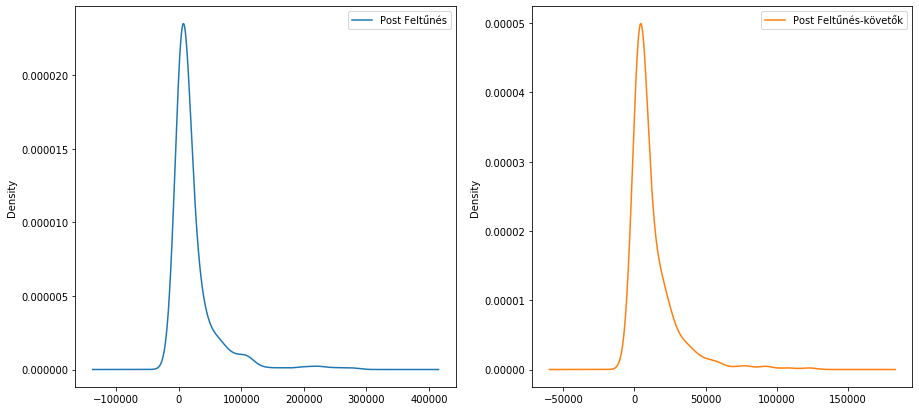

In [389]:
df[impressions].plot.density(subplots=True, sharex=False, layout=(1,2),figsize=(15,7))

Post Feltűnés               AxesSubplot(0.125,0.125;0.352273x0.755)
Post Feltűnés-követők    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

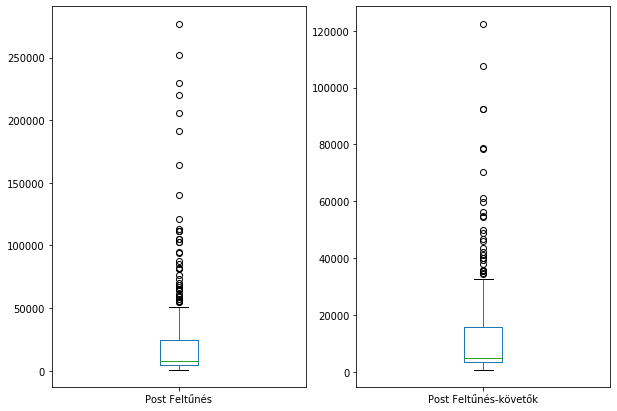

In [390]:
df[impressions].plot.box(subplots=True, sharex=False, layout=(1,2),figsize=(10,7))

#### A clickek számának vizsgálatára hegedű- és dobozábra, illyetve az átlag lekérdezése

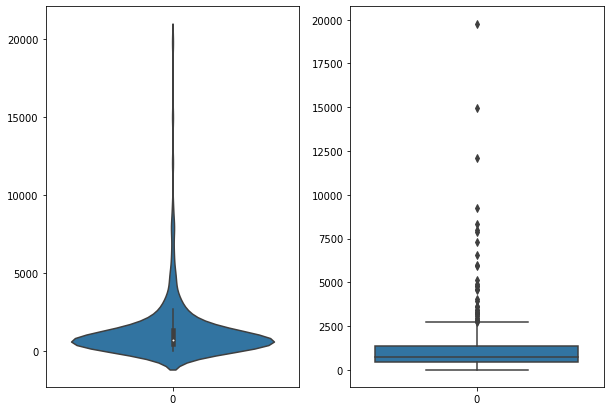

In [391]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
sns.violinplot(data=df['Clickek'],ax=ax[0])
sns.boxplot(data=df['Clickek'],ax=ax[1])

In [392]:
df['Clickek'].mean()

1275.4897959183672

#### Kördiagram a bejegyzés típusának eloszlására (fizetett és nem fizetett bejegyzések)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2926FBCC8>],
      dtype=object)

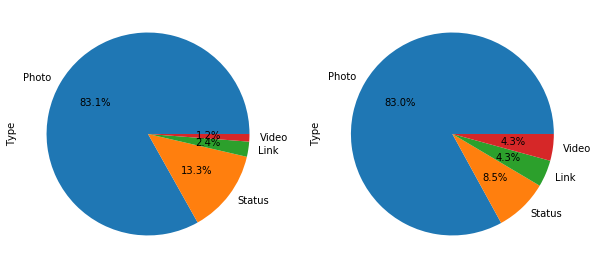

In [393]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
df[(df['Paid']==0)]['Type'].value_counts().plot.pie(y='NotPaid', subplots=True, ax=ax[0], autopct='%1.1f%%')
df[(df['Paid']==1)]['Type'].value_counts().plot.pie(y='Paid', subplots=True, ax=ax[1], autopct='%1.1f%%')

#### Hisztogram a 8 legforgalmasabb órára, kategóriák szerint

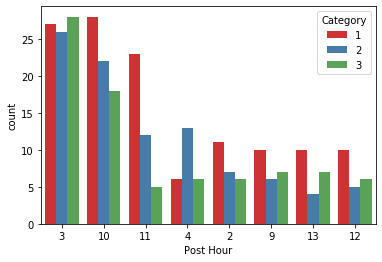

In [394]:
top8hours = list(df['Post Hour'].value_counts()[:8].index)
valami=df[df['Post Hour'].isin(top8hours)]
sns.countplot(data=valami, x='Post Hour', hue='Category', order = top8hours, palette='Set1')

#### Eloszlásfüggvény a likeok számára

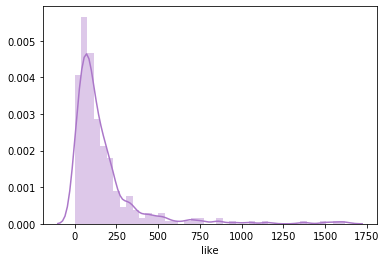

In [395]:
sns.distplot(df['like'], color="#AB77C9")

#### Az oldal likeok számának vizsgálata hónapokra bontva

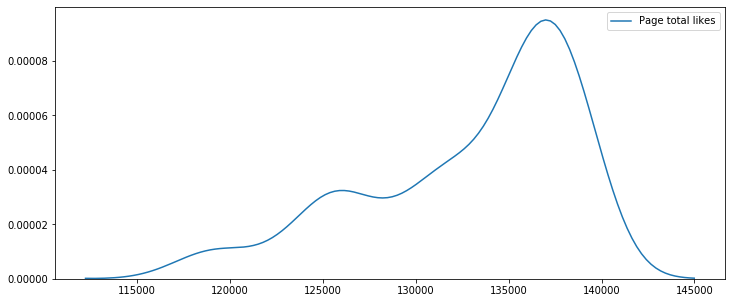

In [396]:
plt.figure(figsize=(12,5))
sns.kdeplot(df['Page total likes'])

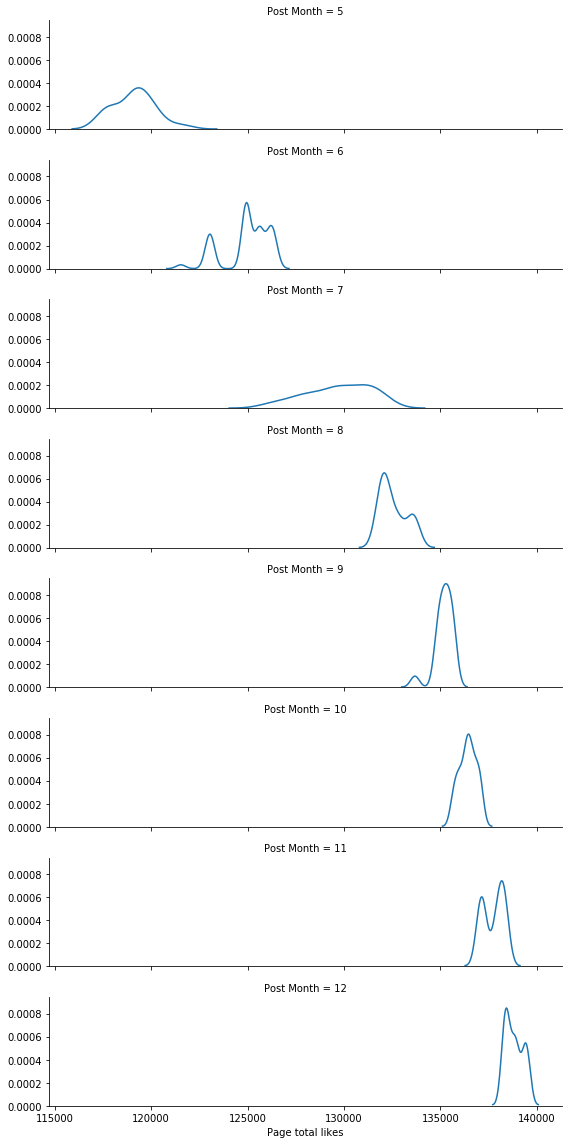

In [397]:
g = sns.FacetGrid(df, row='Post Month', height=2, aspect=4)
g.map(sns.kdeplot, "Page total likes")

#### Korrelációs táblázatok

In [398]:
corr=df.corr()
corr

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Post Nézettség,Post Feltűnés,Egyedi fálhasználók click,Összes felhasználó click,Clickek,Post Feltűnés-követők,Post Nézettség-követők,Követők click,comment,like,share,Total Interactions
Page total likes,1.000000,-0.275446,0.944875,0.103678,-0.128205,-0.033267,-0.068522,-0.005981,-0.076865,-0.096737,-0.121467,-0.004352,-0.057559,-0.008606,-0.006954,0.036785,0.054152,0.035423
Category,-0.275446,1.000000,-0.234892,-0.098028,-0.090957,-0.049216,-0.186125,-0.197456,-0.002835,-0.034761,-0.145506,-0.133663,-0.103766,0.006765,-0.045225,0.135321,0.123644,0.132654
Post Month,0.944875,-0.234892,1.000000,0.088654,-0.150256,-0.047492,-0.085434,-0.027076,-0.082409,-0.100878,-0.127409,-0.028921,-0.078590,-0.019985,-0.026612,0.016239,0.028118,0.014187
Post Weekday,0.103678,-0.098028,0.088654,1.000000,0.010537,-0.010930,-0.101770,-0.107440,-0.003229,0.014375,-0.020036,-0.099100,-0.085086,0.031682,-0.103918,-0.080270,-0.046880,-0.084015
Post Hour,-0.128205,-0.090957,-0.150256,0.010537,1.000000,-0.059773,0.004369,-0.026272,0.031061,0.050378,0.020414,0.020935,0.042350,0.041288,0.009454,-0.081312,-0.098510,-0.081517
Paid,-0.033267,-0.049216,-0.047492,-0.010930,-0.059773,1.000000,0.176417,0.174849,0.056978,0.042566,0.085447,0.141370,0.131023,0.016012,0.059370,0.079657,0.004422,0.075969
Post Nézettség,-0.068522,-0.186125,-0.085434,-0.101770,0.004369,0.176417,1.000000,0.954544,0.492806,0.414595,0.273859,0.825868,0.817601,0.362323,0.316894,0.500327,0.403438,0.500295
Post Feltűnés,-0.005981,-0.197456,-0.027076,-0.107440,-0.026272,0.174849,0.954544,1.000000,0.418649,0.355500,0.244322,0.851838,0.772272,0.316847,0.262457,0.410125,0.339347,0.411267
Egyedi fálhasználók click,-0.076865,-0.002835,-0.082409,-0.003229,0.031061,0.056978,0.492806,0.418649,1.000000,0.978433,0.631199,0.542496,0.655524,0.967563,0.431698,0.522757,0.503106,0.536606
Összes felhasználó click,-0.096737,-0.034761,-0.100878,0.014375,0.050378,0.042566,0.414595,0.355500,0.978433,1.000000,0.652796,0.461782,0.557762,0.963872,0.345621,0.340958,0.379300,0.358936


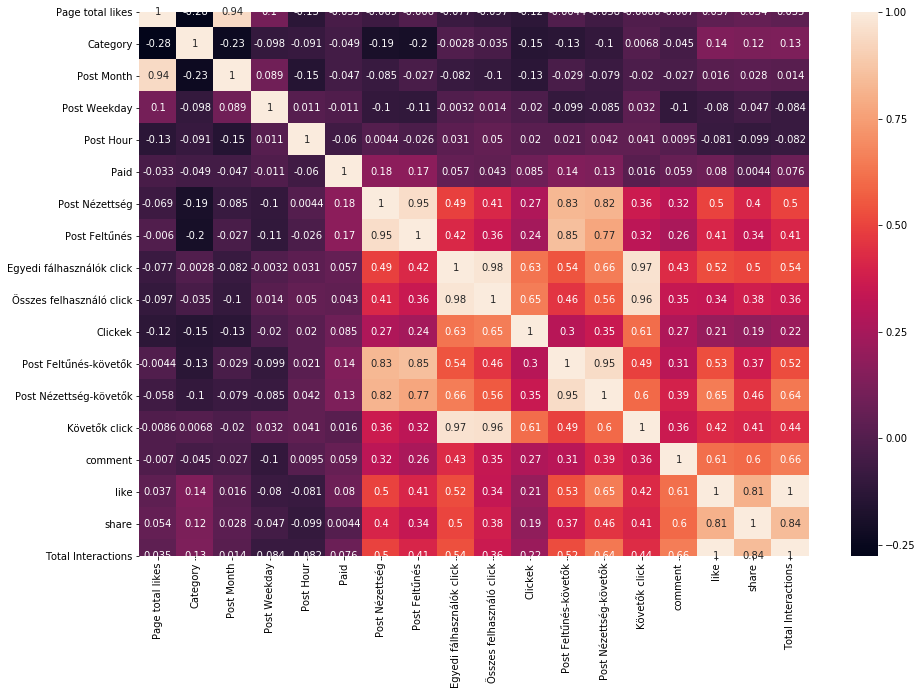

In [399]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True, ax=ax)

#### Pairplot alklamazása a komment, like, megosztások és összesítés oszlopokra

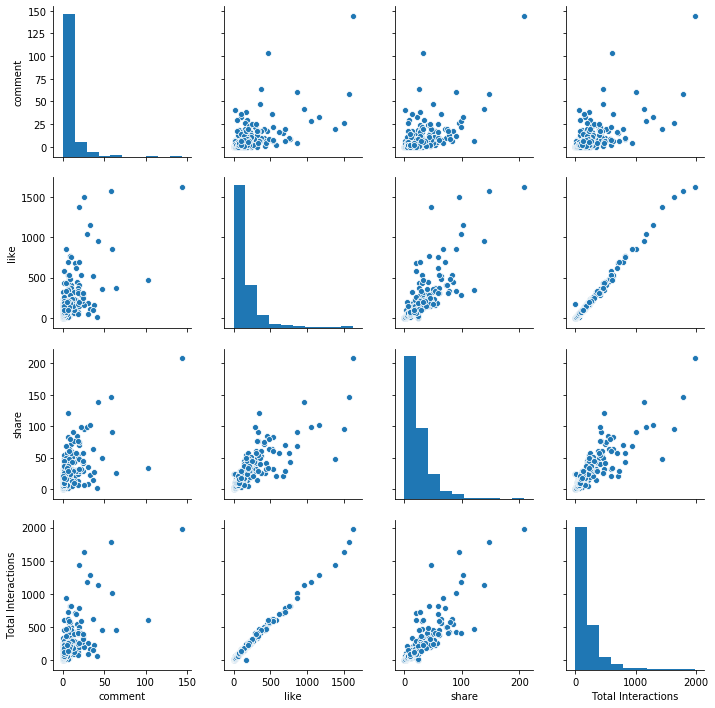

In [400]:
sns.pairplot(harmas)

#### 5 klasztercsoport képzése a like és share oszlopokhoz

In [401]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['like', 'share']]);

#### Középpontok

In [402]:
kmeans.cluster_centers_

array([[ 182.94059406,   30.31683168],
       [1445.2       ,  119.8       ],
       [ 394.27272727,   55.87878788],
       [ 792.9       ,   67.2       ],
       [  60.75773196,   11.86597938]])

#### Csoportosított megjelenítés

In [403]:
def plot_result(kmeans):
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df['like'], y=df['share'], hue=kmeans.labels_, palette="Set3");
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=100, c=['black']);

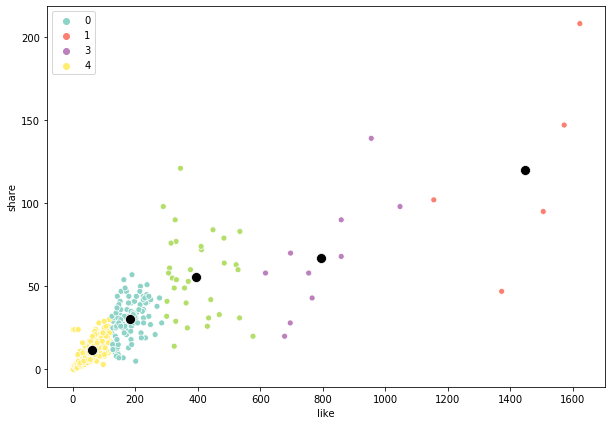

In [404]:
plot_result(kmeans)

#### Ellenőrzések

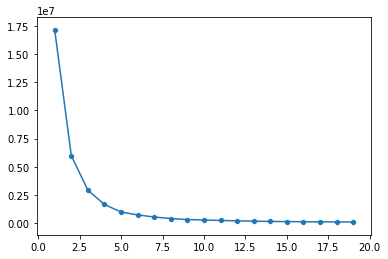

In [405]:
err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['like','share']]);
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1]);

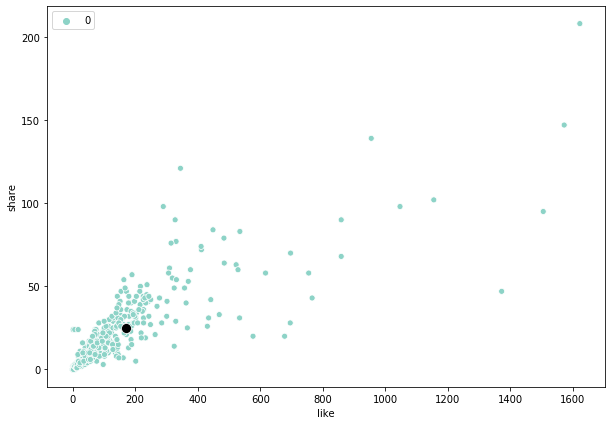

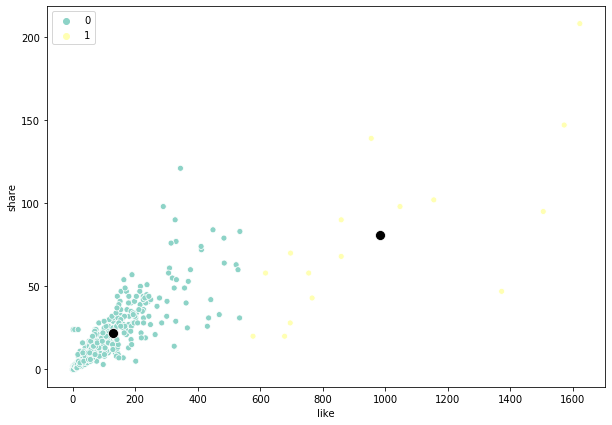

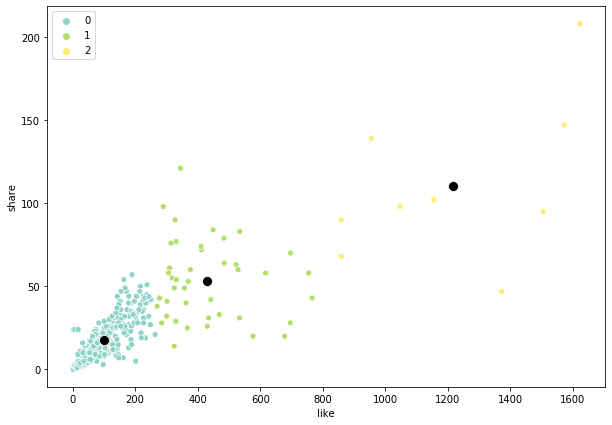

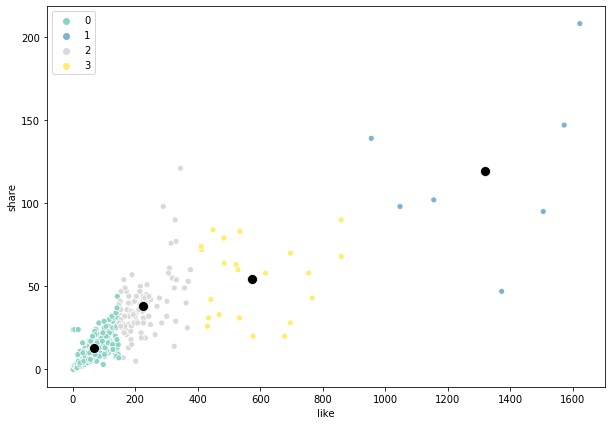

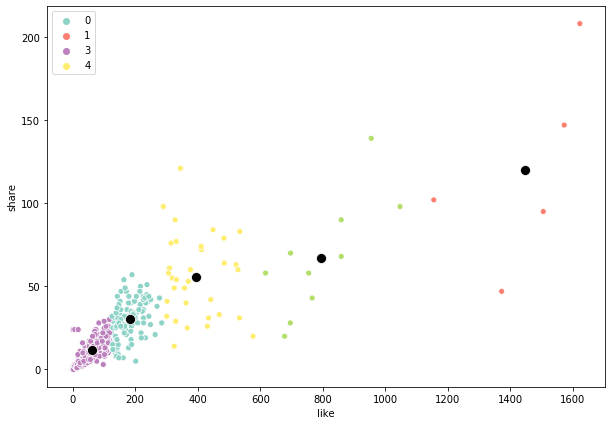

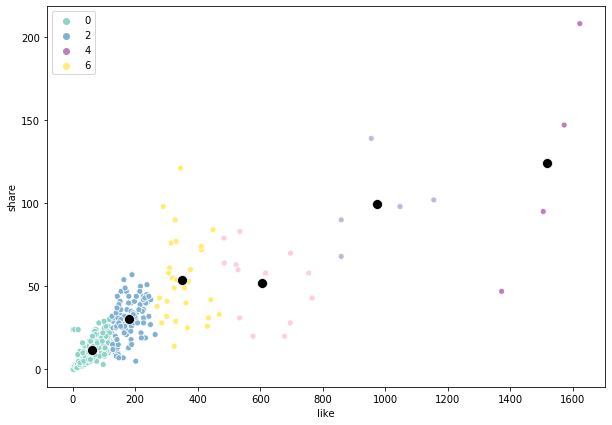

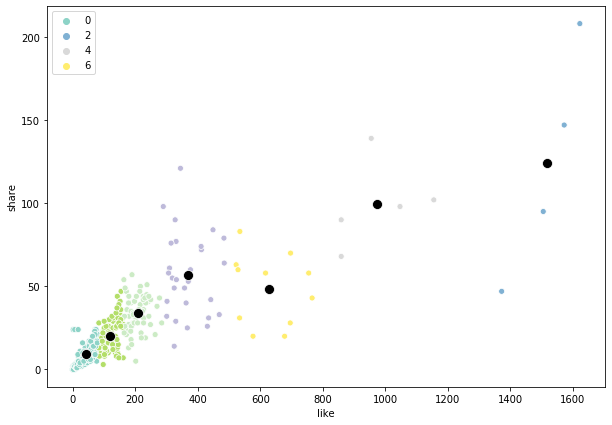

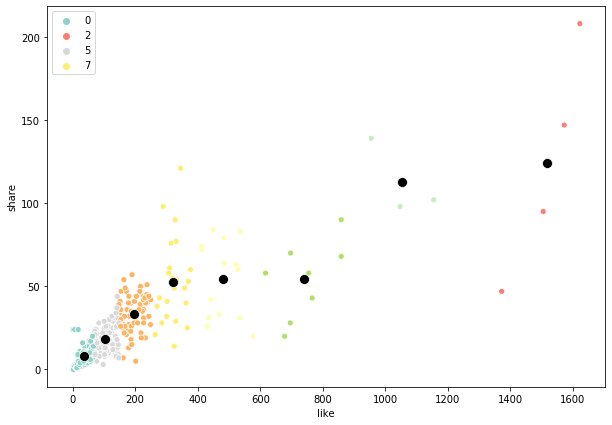

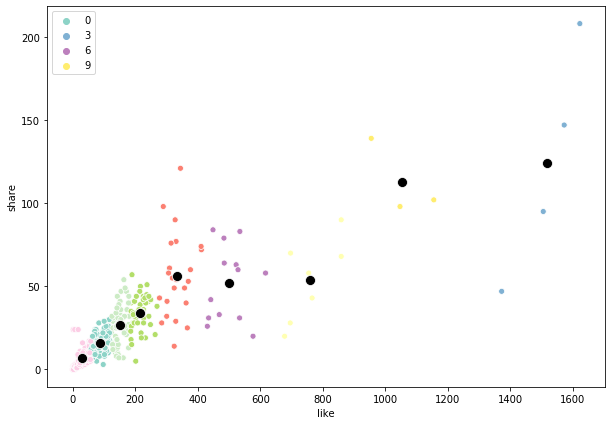

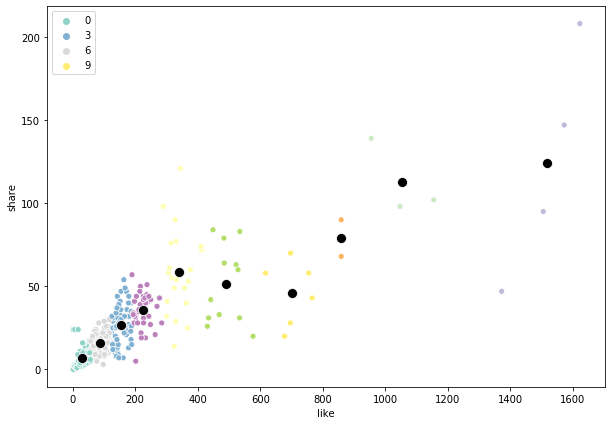

In [406]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['like','share']])
    plot_result(kmeans)

#### 3 dimenziós klaszterezés

In [407]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['like','share','comment']]);

In [408]:
print(kmeans.cluster_centers_)

[[ 182.94059406   30.31683168    7.38613861]
 [1445.2         119.8          56.2       ]
 [ 792.9          67.2          21.1       ]
 [ 394.27272727   55.87878788   17.75757576]
 [  60.75773196   11.86597938    3.01546392]]


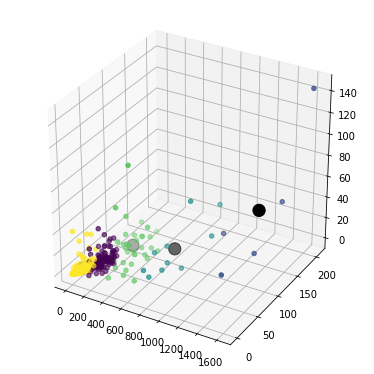

In [409]:
def plot_result_3d(kmeans):
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(df.loc[:,'like'],df.loc[:,'share'],df.loc[:,'comment'], c=kmeans.labels_);
    ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c=['black'], s=150)
plot_result_3d(kmeans)

#### Előrejelzés

In [410]:
kmeans.predict([[800,50,20]])

array([2])

## B.)

#### Attribútumok plotolása lineáris regresszióhoz

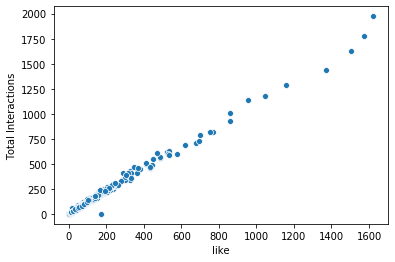

In [411]:
sns.scatterplot(df['like'],df['Total Interactions'])

#### X mátrix előállítása (like oszlop adatai)

In [412]:
X = df[['like']].to_numpy()
X[:10]

array([[  79.],
       [ 130.],
       [  66.],
       [1572.],
       [ 325.],
       [ 152.],
       [ 249.],
       [ 325.],
       [ 161.],
       [ 113.]])

#### y mátrix előállítása (Total Interactions oszlop adatai)

In [413]:
y = df['Total Interactions'].to_numpy()
y[:10]

array([ 100,  164,   80, 1777,  393,  186,  279,  339,  192,  142],
      dtype=int64)

#### Lineáris regresszió illesztése

In [414]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Együtthatók lekérdezése

In [415]:
reg.coef_

array([1.12474984])

#### Konstans lekérdezése

In [416]:
reg.intercept_

9.716813758825651

#### Egyenes illesztése

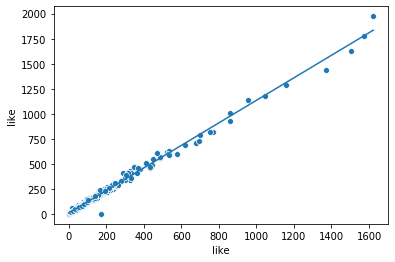

In [417]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['like']
sns.scatterplot(df['like'],df['Total Interactions'])
sns.lineplot(df['like'],h)

#### A szórás megjelenítése

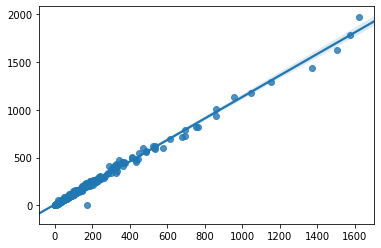

In [418]:
sns.regplot(X,y)

#### Új y értékek prediktálása

In [419]:
Xnew = [[800], [1500]]
ynew = reg.predict(Xnew)
print(ynew)

[ 909.51668206 1696.84156682]


#### Új Popular oszlop létrehozása

In [420]:
df['Popular']=""

In [421]:
conditions = [(df['Total Interactions'] >=400) | (df['Clickek']>=1500),(df['Total Interactions'] <400) & (df['Clickek']<1500)]
choices = [1,0]
df['Popular'] = np.select(conditions, choices)

In [422]:
df['Popular'].value_counts()

0    250
1     93
Name: Popular, dtype: int64

#### Attribútumok plotolása logisztikus regresszióhoz

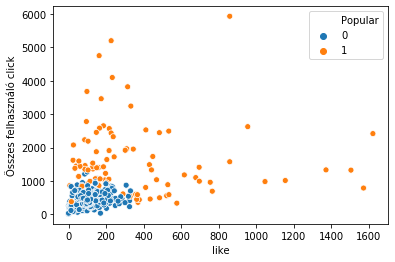

In [423]:
sns.scatterplot(df['like'],df['Összes felhasználó click'],hue=df['Popular'])

#### X mátrix előállítása (like és Clickek oszlopok adatai)

In [424]:
X = df[['like','Összes felhasználó click']].to_numpy()
X[:10]

array([[  79.,  109.],
       [ 130., 1361.],
       [  66.,  113.],
       [1572.,  790.],
       [ 325.,  410.],
       [ 152., 1073.],
       [ 249.,  265.],
       [ 325.,  232.],
       [ 161., 1407.],
       [ 113.,  183.]])

#### y mátrix előállítása (Popular oszlop adatai)

In [425]:
y = df['Popular'].to_numpy()
y[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

#### Logisztikus regresszió illesztése

In [426]:
reg = LogisticRegression()
reg.fit(X,y)

C:\Users\Fruzsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Együtthatók lekérdezése

In [427]:
reg.coef_

array([[0.00726293, 0.00400538]])

#### Konstans lekérdezése

In [428]:
reg.intercept_

array([-5.07021238])

#### Egyenes illesztése

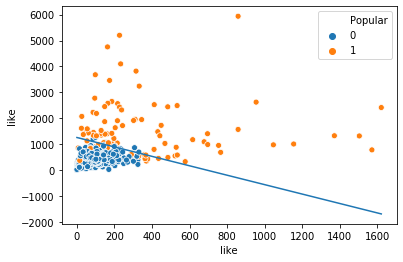

In [429]:
theta0 = reg.intercept_
theta1 = reg.coef_[0,0]
theta2 = reg.coef_[0,1]

x2 = -(theta0+theta1*df['like'])/theta2
sns.scatterplot(df['like'],df['Összes felhasználó click'],hue=df['Popular'])
sns.lineplot(df['like'],x2)

#### Új adat besorolása

In [430]:
reg.predict([
                [150,1500],
                [800,5000]
            ])

array([1, 1])

## C.)

#### Az y attribútumok kiválasztása

In [431]:
df['Category'].unique()

array([2, 3, 1], dtype=int64)

#### Az x numerikus értékek kiválasztása

In [432]:
subdf1=df.loc[:,'Page total likes']
subdf2=df.loc[:,'Category':'Total Interactions']
subdf=pd.concat([subdf1,subdf2],axis=1)
subdf.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Post Nézettség,Post Feltűnés,Egyedi fálhasználók click,Összes felhasználó click,Clickek,Post Feltűnés-követők,Post Nézettség-követők,Követők click,comment,like,share,Total Interactions
0,139441,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [433]:
df[subdf.columns]=subdf
subdf.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Post Nézettség,Post Feltűnés,Egyedi fálhasználók click,Összes felhasználó click,Clickek,Post Feltűnés-követők,Post Nézettség-követők,Követők click,comment,like,share,Total Interactions
0,139441,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


#### Az y-t jobban magyarázó változók kiválasztása -> x2

In [434]:
corrtest=['Post Weekday','Post Hour','Paid','Egyedi fálhasználók click','Összes felhasználó click','Követők click','like','share','comment','Total Interactions']
df[corrtest].head()

,Post Weekday,Post Hour,Paid,Egyedi fálhasználók click,Összes felhasználó click,Követők click,like,share,comment,Total Interactions
0,4,3,0,178,109,119,79.0,17.0,4,100
1,3,10,0,1457,1361,1108,130.0,29.0,5,164
2,3,3,0,177,113,132,66.0,14.0,0,80
3,2,10,1,2211,790,1386,1572.0,147.0,58,1777
4,2,3,0,671,410,396,325.0,49.0,19,393


#### Új oszlop létrehozása -> y2

In [435]:
df['Category_értelmezés']=df['Category'].replace(1,'action')\
                                      .replace(2,'product')\
                                      .replace(3,'inspiration')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Post Nézettség,Post Feltűnés,Egyedi fálhasználók click,Összes felhasználó click,Clickek,Post Feltűnés-követők,Post Nézettség-követők,Követők click,comment,like,share,Total Interactions,Popular,Category_értelmezés
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,0,product
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,1,product
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,0,inspiration
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,1,product
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,0,product


In [436]:
df['Category_értelmezés'].unique()

array(['product', 'inspiration', 'action'], dtype=object)

#### A változók definiálása

In [437]:
X=df[subdf.columns]
X.shape

(343, 18)

In [438]:
X2=df[corrtest]
X2.shape

(343, 10)

In [439]:
Y=df['Category']
Y.shape

(343,)

In [440]:
Y2=df['Category_értelmezés']
Y2.shape

(343,)

#### Dobozdiagram az X értékeire

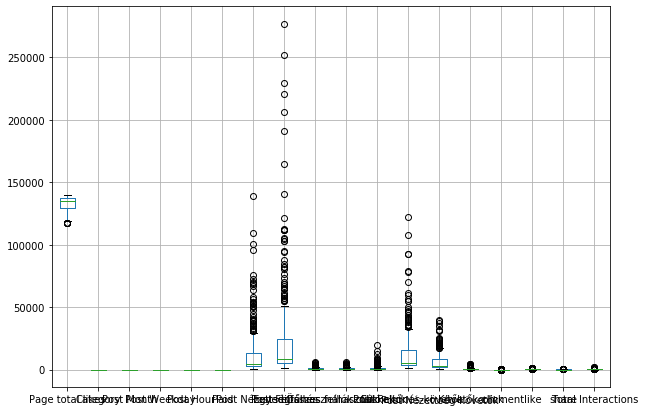

In [441]:
plt.figure(figsize=(10,7))
X.boxplot() 

#### X és Y értékek felbontása tanuló- és teszthalmazokra

In [442]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,stratify=Y)

#### X tanulóhalmaz értékeinek átskálázása

In [443]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Átlagok és skálázási faktorok

In [444]:
scaler.scale_

array([5.40873439e+03, 8.12156557e-01, 2.13609369e+00, 2.05820326e+00,
       4.04586366e+00, 4.45868311e-01, 1.87672088e+04, 3.76909001e+04,
       9.04360875e+02, 8.49456331e+02, 1.75130488e+03, 1.69222995e+04,
       7.02989139e+03, 7.04465260e+02, 1.40876347e+01, 2.34291424e+02,
       2.46907122e+01, 2.64708092e+02])

In [445]:
scaler.mean_

array([1.33215453e+05, 1.86131387e+00, 8.91970803e+00, 4.09124088e+00,
       7.33576642e+00, 2.73722628e-01, 1.23108650e+04, 2.32048942e+04,
       8.66693431e+02, 7.43135036e+02, 1.25738321e+03, 1.27021277e+04,
       6.21004015e+03, 6.27686131e+02, 7.32846715e+00, 1.74751825e+02,
       2.49890511e+01, 2.06273723e+02])

#### Az X értékek normalizálása

In [446]:
X_train_normalized=scaler.transform(X_train)

#### Várható értékek és szórások

In [447]:
X_train_normalized.mean(axis=0)

array([ 5.08919751e-16, -9.07627582e-17,  0.00000000e+00,  1.81525516e-16,
        4.53813791e-17,  3.88983250e-17,  4.21398520e-17, -1.29661083e-17,
        3.24152708e-18, -2.59322166e-17, -2.26906896e-17, -9.72458124e-18,
        8.75212311e-17, -3.24152708e-17, -3.56567979e-17,  3.88983250e-17,
        5.51059603e-17,  4.86229062e-17])

In [448]:
X_train_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

#### Normalizált X-ek dobozdiagramja

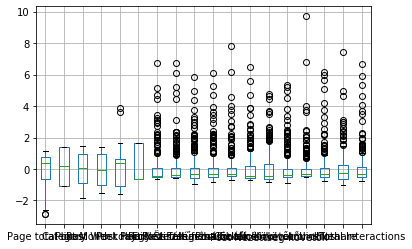

In [449]:
subdf_train_normalized=X_train.copy()
subdf_train_normalized.loc[:,'Page total likes':'Total Interactions']=X_train_normalized
subdf_train_normalized.boxplot()

#### Ugyanezek az X tetszthalmazra

In [450]:
scaler=preprocessing.StandardScaler()
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [451]:
scaler.mean_

array([1.31606435e+05, 1.86956522e+00, 8.52173913e+00, 4.18840580e+00,
       7.66666667e+00, 2.75362319e-01, 1.18569275e+04, 2.38038406e+04,
       7.81521739e+02, 6.75188406e+02, 1.34739130e+03, 1.10471884e+04,
       5.36181159e+03, 5.48188406e+02, 5.81159420e+00, 1.52869565e+02,
       2.36521739e+01, 1.81637681e+02])

In [452]:
scaler.scale_

array([6.46763944e+03, 8.14951648e-01, 2.37504353e+00, 1.97282526e+00,
       3.93669716e+00, 4.46696667e-01, 1.60346902e+04, 3.93466357e+04,
       5.32675544e+02, 4.73574880e+02, 2.48705701e+03, 1.44808653e+04,
       5.90482996e+03, 4.23101429e+02, 7.78194745e+00, 1.63545315e+02,
       2.15902730e+01, 1.83784055e+02])

In [453]:
X_test_normalized=scaler.transform(X_test)

In [454]:
X_test_normalized.mean(axis=0)

array([-1.15215808e-15, -8.52780004e-17, -1.91875501e-16,  6.43607551e-18,
       -5.95336984e-17, -5.14886040e-17, -1.60901888e-17,  1.56879340e-17,
        5.87291890e-17, -9.65411326e-17,  4.92762031e-17, -2.69510662e-17,
       -1.12631321e-16, -1.31939548e-16,  1.44811699e-17, -4.34435097e-17,
        7.72329061e-17,  7.88419249e-17])

In [455]:
X_test_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

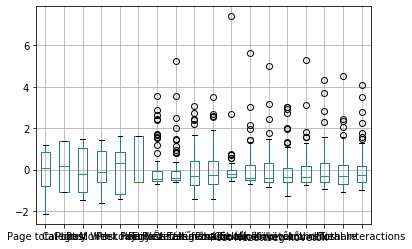

In [456]:
subdf_test_normalized=X_test.copy()
subdf_test_normalized.loc[:,'Page total likes':'Total Interactions']=X_test_normalized
subdf_test_normalized.boxplot()

#### X és Y2 értékek felbontása tanuló- és teszthalmazokra

In [457]:
X_train,X_test,Y2_train,Y2_test=train_test_split(X,Y2,train_size=0.8,stratify=Y2)

#### A teszt és tanulóhalmazok arányos felbontása

In [458]:
Y2_test.value_counts()/Y2_test.shape[0]

action         0.405797
product        0.318841
inspiration    0.275362
Name: Category_értelmezés, dtype: float64

In [459]:
Y2_train.value_counts()/Y2_train.shape[0]

action         0.408759
product        0.321168
inspiration    0.270073
Name: Category_értelmezés, dtype: float64

#### Logisztikai regresszió illesztése X és Y2 tanuló adathalmazokra

In [460]:
reg=LogisticRegression(max_iter=100000)
reg.fit(X_train,Y2_train)

C:\Users\Fruzsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fruzsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### A teszthalmazok értékeinek prediktálása

In [461]:
predicted=reg.predict(X_test)
list(zip(predicted,Y2_test))

[('inspiration', 'inspiration'),
 ('inspiration', 'inspiration'),
 ('product', 'inspiration'),
 ('action', 'action'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('inspiration', 'inspiration'),
 ('action', 'product'),
 ('product', 'product'),
 ('inspiration', 'inspiration'),
 ('product', 'product'),
 ('product', 'product'),
 ('inspiration', 'action'),
 ('action', 'action'),
 ('product', 'product'),
 ('product', 'product'),
 ('action', 'action'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('action', 'action'),
 ('action', 'action'),
 ('action', 'inspiration'),
 ('product', 'product'),
 ('action', 'action'),
 ('action', 'product'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('inspiration', 'product'),
 ('action', 'action'),
 ('product', 'product'),
 ('product', 'inspiration'),
 ('product', 'product'),
 ('action', 'action'),
 ('action', 'product'),
 ('action', 'product'),
 ('inspiration', 'product'),
 ('action', 'action'),
 ('inspiration', 'inspira

#### Ugyanezek csak a szűrt adattáblára

In [462]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,train_size=0.8,stratify=Y2)

In [463]:
X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape

((274, 10), (69, 10), (274,), (69,))

In [464]:
reg2=LogisticRegression(max_iter=100000)
reg2.fit(X2_train,Y2_train)

C:\Users\Fruzsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Fruzsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [465]:
predicted=reg2.predict(X2_test)
list(zip(predicted,Y2_test))

[('inspiration', 'product'),
 ('action', 'inspiration'),
 ('product', 'product'),
 ('inspiration', 'product'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('action', 'action'),
 ('product', 'product'),
 ('action', 'action'),
 ('inspiration', 'product'),
 ('action', 'action'),
 ('action', 'action'),
 ('action', 'inspiration'),
 ('product', 'product'),
 ('action', 'inspiration'),
 ('product', 'product'),
 ('product', 'product'),
 ('action', 'action'),
 ('action', 'action'),
 ('action', 'action'),
 ('action', 'product'),
 ('product', 'product'),
 ('action', 'action'),
 ('action', 'inspiration'),
 ('action', 'action'),
 ('inspiration', 'product'),
 ('inspiration', 'inspiration'),
 ('action', 'action'),
 ('action', 'product'),
 ('action', 'product'),
 ('action', 'action'),
 ('inspiration', 'inspiration'),
 ('inspiration', 'action'),
 ('action', 'inspiration'),
 ('action', 'action'),
 ('product', 'action'),
 ('action', 'act

#### Pontosságok lekérdezése

In [466]:
print("Test Pontosság: ")
accuracy_score(Y2_test,predicted)

Test Pontosság: 


0.5652173913043478

In [467]:
print("Train Pontosság: ")
accuracy_score(Y2_train,reg.predict(X_train))

Train Pontosság: 


0.3467153284671533

In [468]:
print("Normalizált test Pontosság: ")
accuracy_score(Y2_test,reg.predict(X_test_normalized))

Normalizált test Pontosság: 


0.36231884057971014

In [469]:
print("Normalized train Pontosság: ")
accuracy_score(Y2_train,reg.predict(X_train_normalized))

Normalized train Pontosság: 


0.31386861313868614

In [470]:
print("Szűrt X test Pontosság: ")
accuracy_score(Y2_test,reg2.predict(X2_test))

Szűrt X test Pontosság: 


0.5652173913043478

In [471]:
print("Szűrt X train Pontosság: ")
accuracy_score(Y2_train,reg2.predict(X2_train))

Szűrt X train Pontosság: 


0.5437956204379562